Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Epoch 1/30
1875/1875 [==============================] - 49s 24ms/step - loss: 0.4769 - accuracy: 0.8592 - val_loss: 0.1569 - val_accuracy: 0.9510
Epoch 2/30
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2890 - accuracy: 0.9167 - val_loss: 0.1130 - val_accuracy: 0.9655
Epoch 3/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2420 - accuracy: 0.9315 - val_loss: 0.1009 - val_accuracy: 0.9694
Epoch 4/30
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2165 - accuracy: 0.9382 - val_loss: 0.0939 - val_accuracy: 0.9712
Epoch 5/30
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1980 - accuracy: 0.9434 - val_loss: 0.0964 - val_accuracy: 0.9704
Epoch 6/30
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1865 - accuracy: 0.9467 - val_loss: 0.0840 - val_accuracy: 0.9756
Epoch 7/30
1875/1875 [================

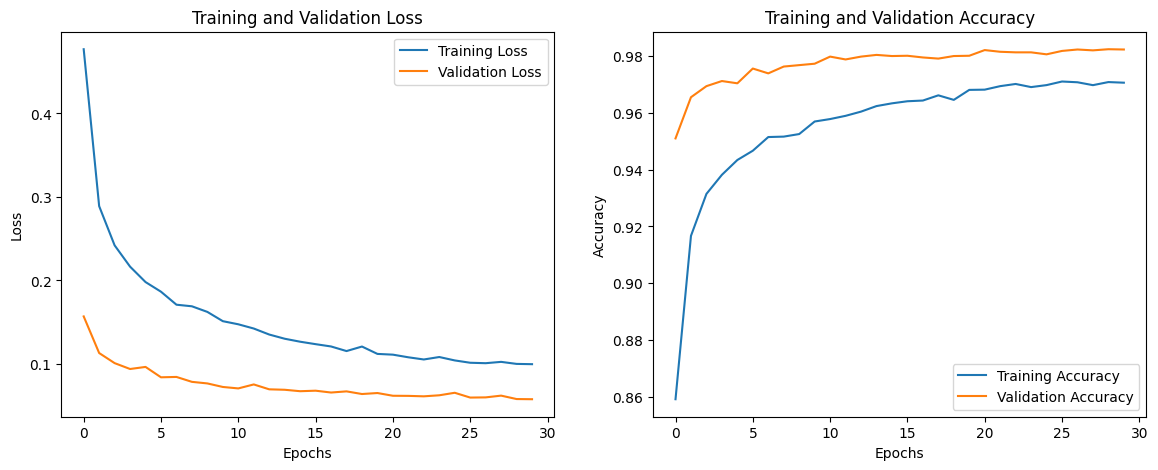

In [1]:
# a. Loading and preprocessing the image data
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Paths to train and test directories
train_dir = './mnist-jpg/train'
test_dir = './mnist-jpg/test'

# Load images with Keras
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32
)

# Normalize images to the range [0, 1]
def normalize_images(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

# b. Defining the model’s architecture
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),   # Flatten input images into a 1D vector
    Dense(256, activation='relu'),      # First hidden layer with 256 units
    BatchNormalization(),               # Batch normalization for stable and faster convergence
    Dropout(0.3),                       # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),      # Second hidden layer with 128 units
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),       # Third hidden layer with 64 units
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),       # Fourth hidden layer with 32 units
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')     # Output layer with 10 units and softmax activation
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# c. Training the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# d. Estimating the model’s performance
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting training loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()